#### Importing the necessary libraries and reading the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('expense.csv')

In [3]:
df.head()

,year,month,debt,rent,employee_salary,marketing
0,2017,Jan,5026,4015,500,2576
1,2017,Feb,5030,4029,501,2193
2,2017,Mar,5049,4062,502,2666
3,2017,Apr,5050,4069,502,2679
4,2017,May,5066,4084,502,2506


The dataset contains the expenses of the company every year and for each month the features of the dataset are
 
 1. year : The year for which the dataset was collected
 2. monthe : month for the data is
 3. debt : The amount of debt the company paid in that month.
 4. rent : The amount of money company spent on rent.
 5. employee_count : The No of employees associated with the company on that month

In [4]:
df['month_year'] = df['month'] + " " + df['year'].astype(str)
df['month_year']

0     Jan 2017
1     Feb 2017
2     Mar 2017
3     Apr 2017
4     May 2017
5     Jun 2017
6     Jul 2017
7     Aug 2017
8     Sep 2017
9     Oct 2017
10    Nov 2017
11    Dec 2017
12    Jan 2018
13    Feb 2018
14    Mar 2018
15    Apr 2018
16    May 2018
17    Jun 2018
18    Jul 2018
19    Aug 2018
20    Sep 2018
21    Oct 2018
22    Nov 2018
23    Dec 2018
24    Jan 2019
25    Feb 2019
26    Mar 2019
27    Apr 2019
28    May 2019
29    Jun 2019
30    Jul 2019
31    Aug 2019
32    Sep 2019
33    Oct 2019
34    Nov 2019
35    Dec 2019
36    Jan 2020
37    Feb 2020
38    Mar 2020
39    Apr 2020
40    May 2020
41    Jun 2020
42    Jul 2020
43    Aug 2020
44    Sep 2020
45    Oct 2020
46    Nov 2020
47    Dec 2020
48    Jan 2021
49    Feb 2021
50    Mar 2021
51    Apr 2021
52    May 2021
53    Jun 2021
54    Jul 2021
55    Aug 2021
56    Sep 2021
57    Oct 2021
58    Nov 2021
59    Dec 2021
Name: month_year, dtype: object

In [5]:
df.head()

,year,month,debt,rent,employee_salary,marketing,month_year
0,2017,Jan,5026,4015,500,2576,Jan 2017
1,2017,Feb,5030,4029,501,2193,Feb 2017
2,2017,Mar,5049,4062,502,2666,Mar 2017
3,2017,Apr,5050,4069,502,2679,Apr 2017
4,2017,May,5066,4084,502,2506,May 2017


In [6]:
df.isnull().sum()

year               0
month              0
debt               0
rent               0
employee_salary    0
marketing          0
month_year         0
dtype: int64

### EDA on the dataset

In [7]:
### name of all the features
features = df.columns[2:]
features

Index(['debt', 'rent', 'employee_salary', 'marketing', 'month_year'], dtype='object')

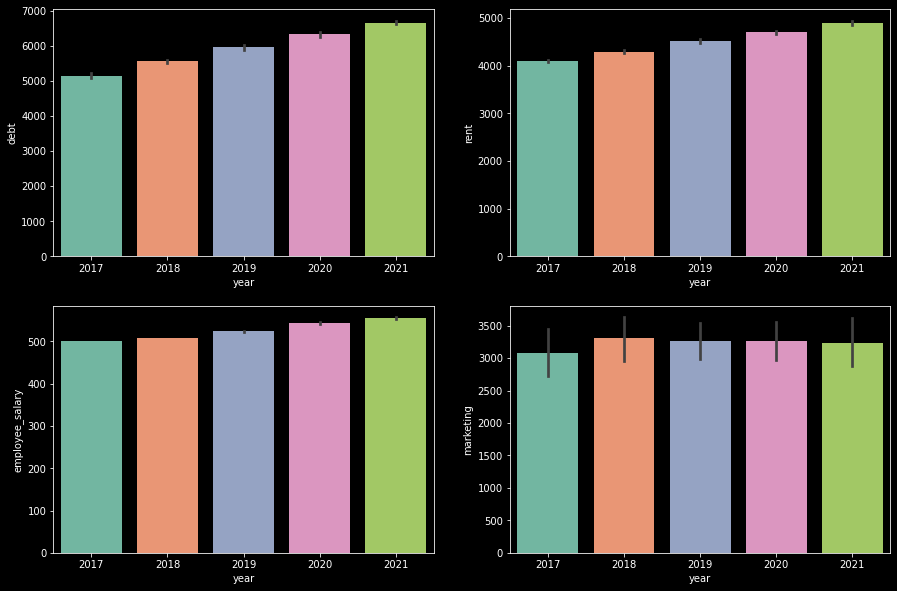

In [8]:
### Plot of expenses of the company year by year

f, ax = plt.subplots(2, 2, figsize=(15, 10))
k=0

for i in range(2):
    for j in range(2):
        if k < 4 :
            sns.barplot(x='year', y=features[k], data=df, ax=ax[i][j], palette='Set2')
            k+=1

plt.show()

### Insights from the above plot
 
 1. plot between year and debt which show's the debt of company is growing year by year.
 2. plot between year and rent shows that it is increasing year by year.
 3. plot between year and employee_count shows that employees are increasing day by day.
 4. A plot between year and marketing which show the marketing of the company reached its peak in the year 2018 and it is decreasing from their. 

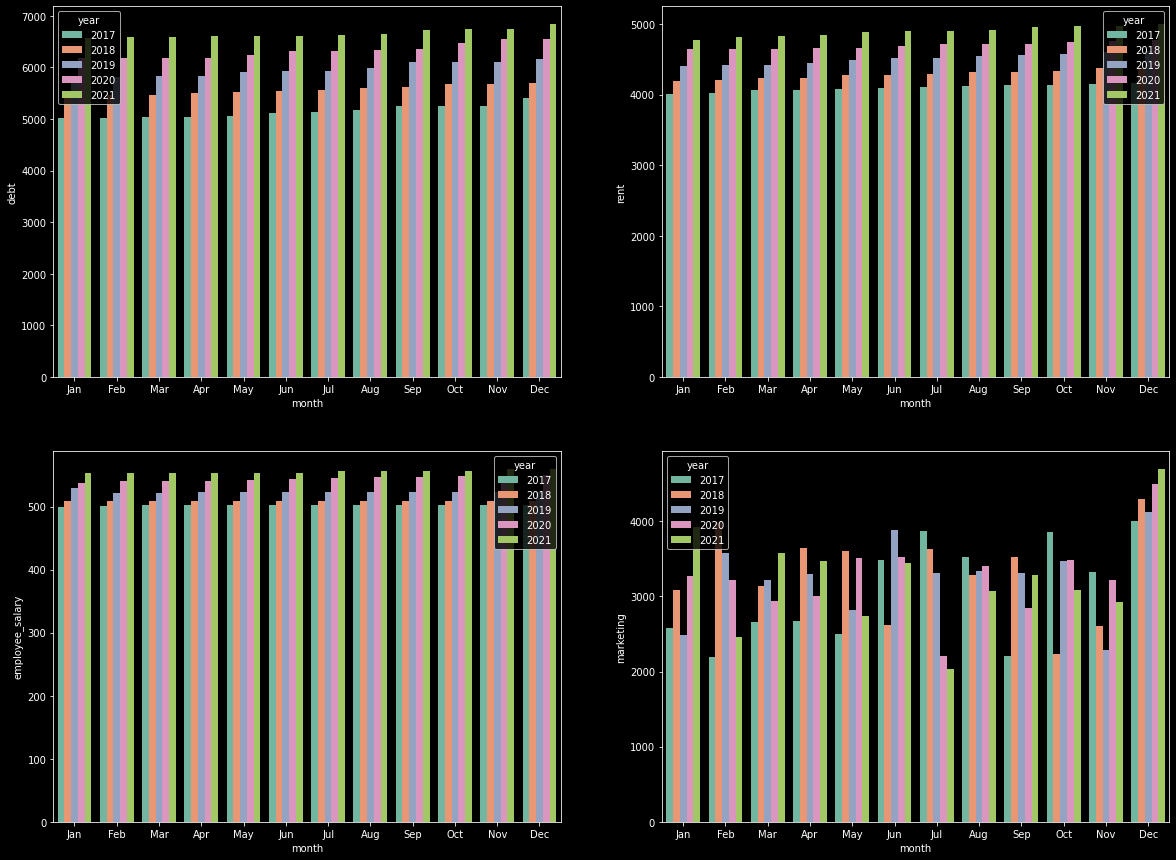

In [9]:
#### Plot of the expenses of the company in every month

f, ax = plt.subplots(2, 2, figsize=(20, 15))
k=0

for i in range(2):
    for j in range(2):
        if k < 4 :
            sns.barplot(x='month', y=features[k], data=df, hue='year', ax=ax[i][j], palette='Set2')
            k+=1

plt.show()

#### Insights from the above plot 

1. Marketing in the month of december is highest that means company spends more in marketing in december

In [10]:
#### Separate the data that we want for training the model

data = df[df.columns[2:]]
data

,debt,rent,employee_salary,marketing,month_year
0,5026,4015,500,2576,Jan 2017
1,5030,4029,501,2193,Feb 2017
2,5049,4062,502,2666,Mar 2017
3,5050,4069,502,2679,Apr 2017
4,5066,4084,502,2506,May 2017
5,5112,4089,502,3486,Jun 2017
6,5138,4102,502,3875,Jul 2017
7,5169,4120,502,3523,Aug 2017
8,5249,4133,502,2208,Sep 2017
9,5253,4134,502,3864,Oct 2017


#### Split the dataset into train and test

In [11]:
df_train = data[:48]
df_test = data[49:]

#### Sacling of the data

In [12]:
from sklearn.preprocessing import MinMaxScaler

exp_list = [i for i in df_train.columns if i != 'month_year']
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train[exp_list])
scaled_test = scaler.fit_transform(df_test[exp_list])

In [13]:
scaled_train

array([[0.        , 0.        , 0.        , 0.16601647],
       [0.00260586, 0.01830065, 0.02      , 0.        ],
       [0.01498371, 0.06143791, 0.04      , 0.20502818],
       [0.01563518, 0.07058824, 0.04      , 0.2106632 ],
       [0.02605863, 0.09019608, 0.04      , 0.13567404],
       [0.05602606, 0.09673203, 0.04      , 0.56046814],
       [0.07296417, 0.11372549, 0.04      , 0.72908539],
       [0.09315961, 0.1372549 , 0.04      , 0.57650629],
       [0.14527687, 0.15424837, 0.04      , 0.00650195],
       [0.14788274, 0.15555556, 0.04      , 0.7243173 ],
       [0.15309446, 0.18300654, 0.04      , 0.49024707],
       [0.25081433, 0.2       , 0.04      , 0.78326831],
       [0.25667752, 0.23137255, 0.18      , 0.38751625],
       [0.28338762, 0.25620915, 0.18      , 0.78240139],
       [0.29250814, 0.29281046, 0.18      , 0.41048981],
       [0.30618893, 0.29411765, 0.18      , 0.62982228],
       [0.3276873 , 0.34248366, 0.18      , 0.61161682],
       [0.34267101, 0.35163399,

In [14]:
### It is a function to prepare the dataset which is to look back to 6 months and predict future expenses

def split_sequence(sequence, look_back, forecast_horizon):
    
    X, y = list(), list()
    for i in range(len(sequence)) :
        lag_end = i + look_back
        forecast_end = lag_end + forecast_horizon
        if forecast_end > len(sequence) :
            break
        seq_x, seq_y = sequence[i:lag_end], sequence[lag_end:forecast_end]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [15]:
### We are considering last 6 months and perform forecasting for next 2

LOOK_BACK = 6
FORECAST_RANGE = 2
n_features = len(exp_list)

X_train, y_train = split_sequence(scaled_train, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)
X_test, y_test = split_sequence(scaled_test, look_back=LOOK_BACK, forecast_horizon=FORECAST_RANGE)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41, 6, 4)
(41, 2, 4)
(4, 6, 4)
(4, 2, 4)


In [16]:
X_train

array([[[0.        , 0.        , 0.        , 0.16601647],
        [0.00260586, 0.01830065, 0.02      , 0.        ],
        [0.01498371, 0.06143791, 0.04      , 0.20502818],
        [0.01563518, 0.07058824, 0.04      , 0.2106632 ],
        [0.02605863, 0.09019608, 0.04      , 0.13567404],
        [0.05602606, 0.09673203, 0.04      , 0.56046814]],

       [[0.00260586, 0.01830065, 0.02      , 0.        ],
        [0.01498371, 0.06143791, 0.04      , 0.20502818],
        [0.01563518, 0.07058824, 0.04      , 0.2106632 ],
        [0.02605863, 0.09019608, 0.04      , 0.13567404],
        [0.05602606, 0.09673203, 0.04      , 0.56046814],
        [0.07296417, 0.11372549, 0.04      , 0.72908539]],

       [[0.01498371, 0.06143791, 0.04      , 0.20502818],
        [0.01563518, 0.07058824, 0.04      , 0.2106632 ],
        [0.02605863, 0.09019608, 0.04      , 0.13567404],
        [0.05602606, 0.09673203, 0.04      , 0.56046814],
        [0.07296417, 0.11372549, 0.04      , 0.72908539],
        [0

In [17]:
y_test

array([[[0.2627451 , 0.57837838, 0.42857143, 0.38941044],
        [0.56862745, 0.78378378, 0.42857143, 0.4690199 ]],

       [[0.56862745, 0.78378378, 0.42857143, 0.4690199 ],
        [0.59607843, 0.84324324, 0.57142857, 0.39391664]],

       [[0.59607843, 0.84324324, 0.57142857, 0.39391664],
        [0.65882353, 0.86486486, 0.85714286, 0.33158092]],

       [[0.65882353, 0.86486486, 0.85714286, 0.33158092],
        [1.        , 1.        , 1.        , 1.        ]]])

#### Baseline Model

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
# from plot_model import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [19]:
### For saving the best model 
checkpoint_filepath = 'path_to_checkpoint_filepath'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)

### Early stoping the model
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')

### Reduce on plateau for decreasing learning rate
rlop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode='min', patience=3, min_lr=0.001)

In [20]:
### function to inverse the normalization

def inverse_transform(y_test, y_hat):
    y_test_reshaped = y_test.reshape(-1, y_test.shape[-1])
    y_hat_reshaped = y_hat.reshape(-1, y_hat.shape[-1])
    
    y_hat_inverse = scaler.inverse_transform(y_hat_reshaped)
    y_test_inverse = scaler.inverse_transform(y_test_reshaped)
    
    return y_hat_inverse, y_test_inverse

In [21]:
### Evaluation metrics

def evaluate_forecast(y_test_inverse, y_hat_inverse):
 mse_ = tf.keras.losses.MeanSquaredError()
 mae_ = tf.keras.losses.MeanAbsoluteError()
 mape_ = tf.keras.losses.MeanAbsolutePercentageError()
 mae = mae_(y_test_inverse,y_hat_inverse)
 print('mae:', mae)
 mse = mse_(y_test_inverse,y_hat_inverse)
 print('mse:', mse)
 mape = mape_(y_test_inverse,y_hat_inverse)
 print('mape:', mape)

#### Model Building

 * TimeDistributed Layer :  https://github.com/keras-team/keras/issues/1029.
 * RepeatVector : https://stackoverflow.com/questions/51749404/how-to-connect-lstm-layers-in-keras-repeatvector-or-return-sequence-true

 * Both Topics : https://towardsdatascience.com/step-by-step-understanding-lstm-autoencoder-layers-ffab055b6352


In [22]:
epochs = 10
batch_size = 4
validation = 0.1

In [23]:
### Encoder-Decoder Model

model_enc_dec = Sequential()
model_enc_dec.add(LSTM(10, activation='relu', input_shape=(LOOK_BACK, n_features)))
model_enc_dec.add(RepeatVector(FORECAST_RANGE))
model_enc_dec.add(LSTM(10, activation='relu', return_sequences=True))
model_enc_dec.add(TimeDistributed(Dense(n_features)))
model_enc_dec.compile(optimizer='adam', loss='mse')

# plot_model(model=model_enc_dec, show_shapes=True)

history = model_enc_dec.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,
                            callbacks=[early_stopping_callback, checkpoint_callback, rlop_callback])

y_hat = model_enc_dec.predict(X_test, verbose=0)

y_hat_inverse, y_test_inverse = inverse_transform(y_test, y_hat)

evaluate_forecast(y_test_inverse, y_hat_inverse)

Epoch 1/10
9/9 [==============================] - 15s 762ms/step - loss: 0.2592 - val_loss: 0.7005 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - 4s 458ms/step - loss: 0.2451 - val_loss: 0.6750 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - 5s 634ms/step - loss: 0.2293 - val_loss: 0.6425 - lr: 0.0010
Epoch 4/10
9/9 [==============================] - 4s 499ms/step - loss: 0.2110 - val_loss: 0.6001 - lr: 0.0010
Epoch 5/10
9/9 [==============================] - 5s 571ms/step - loss: 0.1871 - val_loss: 0.5398 - lr: 0.0010
Epoch 6/10
9/9 [==============================] - 4s 510ms/step - loss: 0.1572 - val_loss: 0.4446 - lr: 0.0010
Epoch 7/10
9/9 [==============================] - 3s 433ms/step - loss: 0.1155 - val_loss: 0.2987 - lr: 0.0010
Epoch 8/10
9/9 [==============================] - 4s 471ms/step - loss: 0.0749 - val_loss: 0.1959 - lr: 0.0010
Epoch 9/10
9/9 [==============================] - 4s 560ms/step - loss: 0.0636 - val_loss: 0.1498 - lr: 0.0010


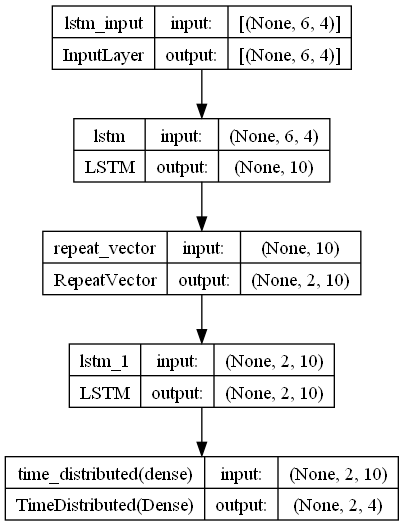

In [24]:
plot_model(model=model_enc_dec, show_shapes=True)

In [25]:
### CNN-LSTM Encoder-Decoder Model

model_enc_dec_cnn = Sequential()
model_enc_dec_cnn.add(Conv1D(filters=4,kernel_size=3, activation='relu', input_shape=(LOOK_BACK, n_features)))
model_enc_dec_cnn.add(Conv1D(filters=4, kernel_size=4, activation='relu'))
model_enc_dec_cnn.add(MaxPooling1D(pool_size=1))
model_enc_dec_cnn.add(Flatten())
model_enc_dec_cnn.add(RepeatVector(FORECAST_RANGE))
model_enc_dec_cnn.add(LSTM(20, activation='relu', return_sequences=True))
model_enc_dec_cnn.add(TimeDistributed(Dense(100, activation='relu')))
model_enc_dec_cnn.add(TimeDistributed(Dense(n_features)))
model_enc_dec_cnn.compile(loss='mse', optimizer='adam')

history = model_enc_dec_cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,
                            callbacks=[early_stopping_callback, checkpoint_callback, rlop_callback])

y_hat = model_enc_dec_cnn.predict(X_test, verbose=0)

y_hat_inverse, y_test_inverse = inverse_transform(y_test, y_hat)

evaluate_forecast(y_test_inverse, y_hat_inverse)

Epoch 1/10
9/9 [==============================] - 5s 81ms/step - loss: 0.2599 - val_loss: 0.6792 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - 0s 25ms/step - loss: 0.2274 - val_loss: 0.6154 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - 0s 24ms/step - loss: 0.1914 - val_loss: 0.5356 - lr: 0.0010
Epoch 4/10
9/9 [==============================] - 0s 37ms/step - loss: 0.1521 - val_loss: 0.4439 - lr: 0.0010
Epoch 5/10
9/9 [==============================] - 0s 20ms/step - loss: 0.1093 - val_loss: 0.3428 - lr: 0.0010
Epoch 6/10
9/9 [==============================] - 0s 19ms/step - loss: 0.0793 - val_loss: 0.2377 - lr: 0.0010
Epoch 7/10
9/9 [==============================] - 0s 17ms/step - loss: 0.0608 - val_loss: 0.1808 - lr: 0.0010
Epoch 8/10
9/9 [==============================] - 0s 17ms/step - loss: 0.0608 - val_loss: 0.1558 - lr: 0.0010
Epoch 9/10
9/9 [==============================] - 0s 15ms/step - loss: 0.0562 - val_loss: 0.1651 - lr: 0.0010
Epoch 10/1

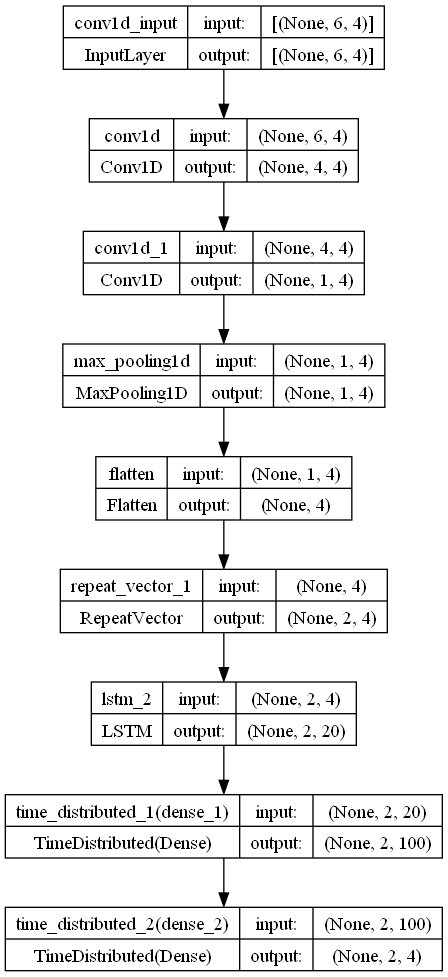

In [26]:
plot_model(model=model_enc_dec_cnn, show_shapes=True)

In [27]:
y_hat.shape

(4, 2, 4)

In [28]:
### Vector Output model

input_layer = Input(shape=(LOOK_BACK, n_features)) 
conv = Conv1D(filters=4, kernel_size=3, activation='relu')(input_layer)
conv = Conv1D(filters=6, kernel_size=4, activation='relu')(conv)
lstm = LSTM(100, return_sequences=True, activation='relu')(conv)
dropout = Dropout(0.2)(lstm)
lstm = LSTM(100, activation='relu')(dropout)
dense = Dense(FORECAST_RANGE*n_features, activation='relu')(lstm)
output_layer = Reshape((FORECAST_RANGE,n_features))(dense)
model_vector_output = Model([input_layer], [output_layer])
model_vector_output.compile(optimizer='adam', loss='mse')

history = model_vector_output.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,
                            callbacks=[early_stopping_callback, checkpoint_callback, rlop_callback])

y_hat = model_vector_output.predict(X_test, verbose=0)

y_hat_inverse, y_test_inverse = inverse_transform(y_test, y_hat)

evaluate_forecast(y_test_inverse, y_hat_inverse)

Epoch 1/10
9/9 [==============================] - 3s 70ms/step - loss: 0.2673 - val_loss: 0.7092 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - 0s 20ms/step - loss: 0.2539 - val_loss: 0.6733 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 0.2336 - val_loss: 0.6147 - lr: 0.0010
Epoch 4/10
9/9 [==============================] - 0s 18ms/step - loss: 0.2062 - val_loss: 0.5132 - lr: 0.0010
Epoch 5/10
9/9 [==============================] - 0s 16ms/step - loss: 0.1557 - val_loss: 0.3516 - lr: 0.0010
Epoch 6/10
9/9 [==============================] - 0s 17ms/step - loss: 0.0885 - val_loss: 0.1629 - lr: 0.0010
Epoch 7/10
9/9 [==============================] - 0s 24ms/step - loss: 0.0591 - val_loss: 0.1811 - lr: 0.0010
Epoch 8/10
6/9 [===================>..........] - ETA: 0s - loss: 0.0598

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 6s 808ms/step - loss: 0.0547 - val_loss: 0.1456 - lr: 0.0010
Epoch 9/10
9/9 [==============================] - 0s 16ms/step - loss: 0.0516 - val_loss: 0.1508 - lr: 0.0010
Epoch 10/10
9/9 [==============================] - ETA: 0s - loss: 0.0517

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 4s 539ms/step - loss: 0.0517 - val_loss: 0.1449 - lr: 0.0010
mae: tf.Tensor(136.50531, shape=(), dtype=float32)
mse: tf.Tensor(106791.17, shape=(), dtype=float32)
mape: tf.Tensor(3.443636, shape=(), dtype=float32)


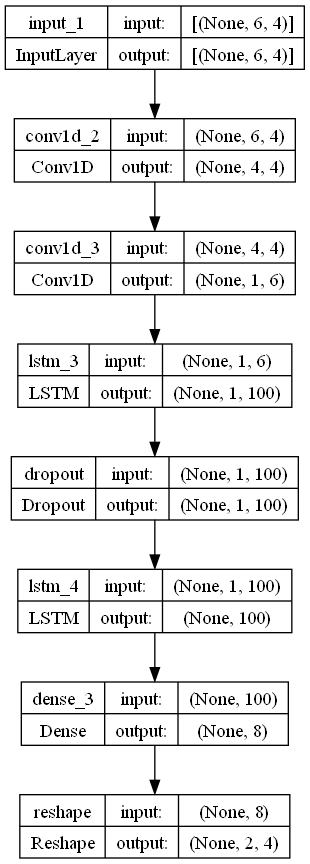

In [29]:
plot_model(model=model_vector_output, show_shapes=True)

In [30]:
### Multi-Head CNN-LSTM Model

input_layer = Input(shape=(LOOK_BACK, n_features)) 
head_list = []
for i in range(0, n_features):
 conv_layer_head = Conv1D(filters=4, kernel_size=3, activation='relu')(input_layer)
 conv_layer_head_2 = Conv1D(filters=4, kernel_size=4, activation='relu')(conv_layer_head)
 conv_layer_flatten = Flatten()(conv_layer_head_2)
 head_list.append(conv_layer_flatten)
 
concat_cnn = Concatenate(axis=1)(head_list)
reshape = Reshape((head_list[0].shape[1], n_features))(concat_cnn)
lstm = LSTM(100, activation='relu')(reshape)
repeat = RepeatVector(FORECAST_RANGE)(lstm)
lstm_2 = LSTM(100, activation='relu', return_sequences=True)(repeat)
dropout = Dropout(0.05)(lstm_2)
dense = Dense(n_features, activation='linear')(dropout)
multi_head_cnn_lstm_model = Model(inputs=input_layer, outputs=dense)
multi_head_cnn_lstm_model.compile(optimizer='adam', loss='mse')

history = multi_head_cnn_lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation,
                            callbacks=[early_stopping_callback, checkpoint_callback, rlop_callback])

y_hat = multi_head_cnn_lstm_model.predict(X_test, verbose=0)

y_hat_inverse, y_test_inverse = inverse_transform(y_test, y_hat)

evaluate_forecast(y_test_inverse, y_hat_inverse)

Epoch 1/10
9/9 [==============================] - 3s 79ms/step - loss: 0.2624 - val_loss: 0.6792 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - 0s 21ms/step - loss: 0.2285 - val_loss: 0.5788 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - 0s 23ms/step - loss: 0.1561 - val_loss: 0.3083 - lr: 0.0010
Epoch 4/10
9/9 [==============================] - 0s 25ms/step - loss: 0.0787 - val_loss: 0.1463 - lr: 0.0010
Epoch 5/10
7/9 [======================>.......] - ETA: 0s - loss: 0.0611

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 6s 705ms/step - loss: 0.0584 - val_loss: 0.1314 - lr: 0.0010
Epoch 6/10
7/9 [======================>.......] - ETA: 0s - loss: 0.0537

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 5s 676ms/step - loss: 0.0522 - val_loss: 0.0865 - lr: 0.0010
Epoch 7/10
7/9 [======================>.......] - ETA: 0s - loss: 0.0468

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 5s 645ms/step - loss: 0.0484 - val_loss: 0.0811 - lr: 0.0010
Epoch 8/10
8/9 [=========================>....] - ETA: 0s - loss: 0.0443

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 5s 662ms/step - loss: 0.0450 - val_loss: 0.0722 - lr: 0.0010
Epoch 9/10
9/9 [==============================] - ETA: 0s - loss: 0.0390

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 7s 890ms/step - loss: 0.0390 - val_loss: 0.0529 - lr: 0.0010
Epoch 10/10
8/9 [=========================>....] - ETA: 0s - loss: 0.0322

INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


INFO:tensorflow:Assets written to: path_to_checkpoint_filepath\assets


9/9 [==============================] - 6s 809ms/step - loss: 0.0348 - val_loss: 0.0450 - lr: 0.0010
mae: tf.Tensor(121.27098, shape=(), dtype=float32)
mse: tf.Tensor(72316.0, shape=(), dtype=float32)
mape: tf.Tensor(3.1095977, shape=(), dtype=float32)


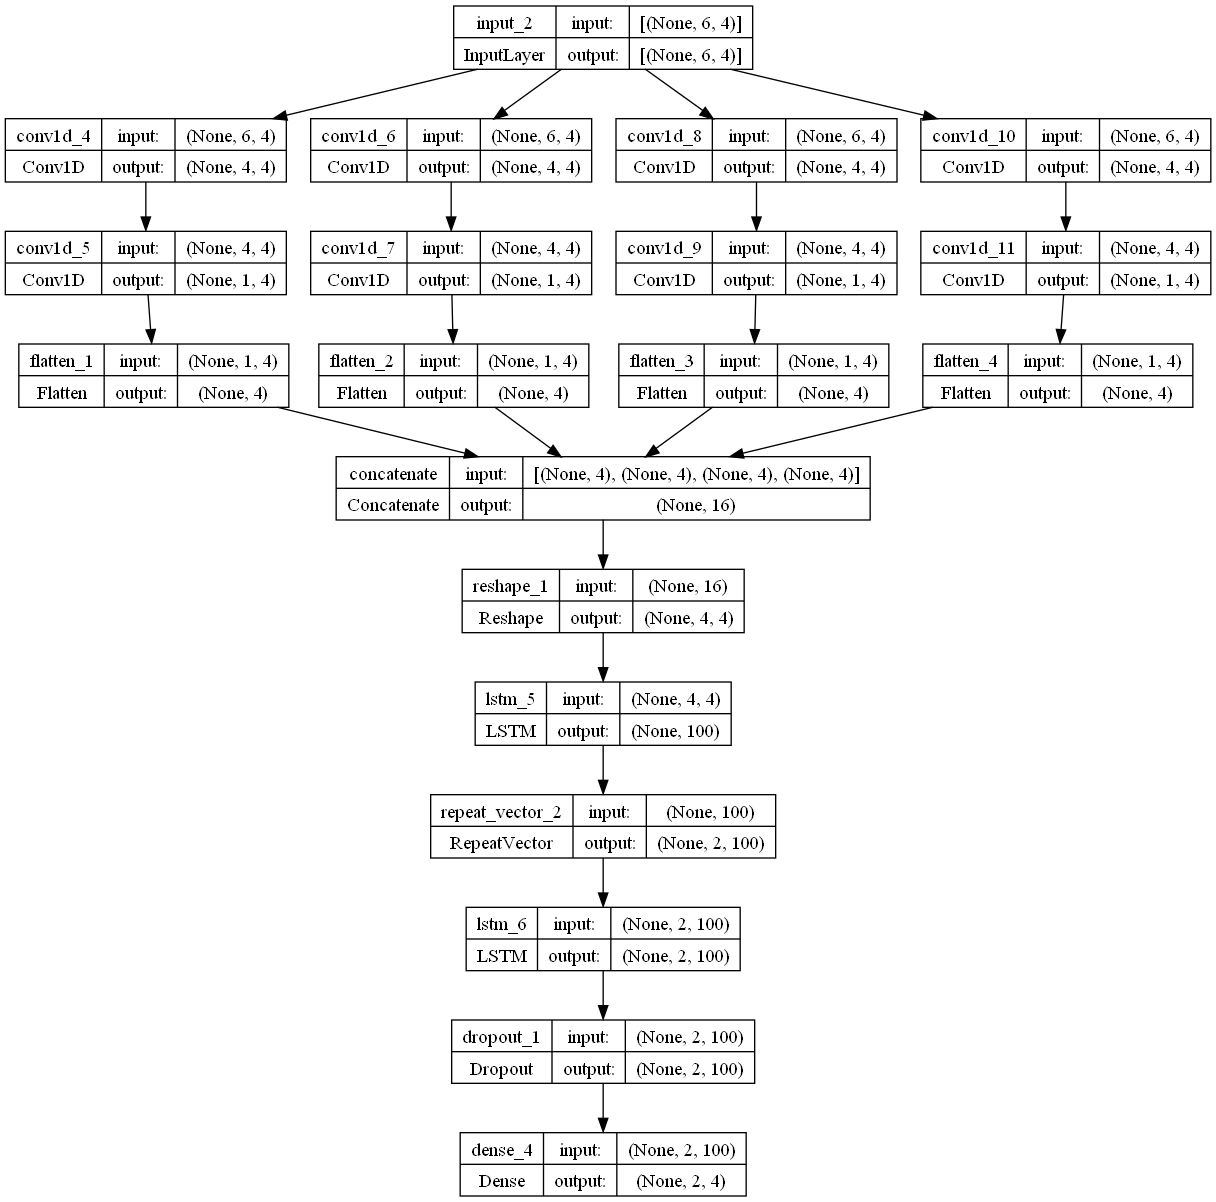

In [31]:
plot_model(model=multi_head_cnn_lstm_model, show_shapes=True)

#### Evaluating the model

Text(0, 0.5, 'MAPE')

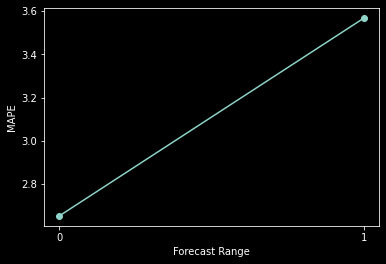

In [32]:
y_test_inverse_time_step = y_test_inverse.reshape(int(y_test_inverse.shape[0]/FORECAST_RANGE),
                                                  FORECAST_RANGE, y_test_inverse.shape[-1])

y_hat_inverse_time_step = y_hat_inverse.reshape(int(y_hat_inverse.shape[0]/FORECAST_RANGE),
                                                FORECAST_RANGE, y_hat_inverse.shape[-1])

### y_hat_inverse_time_step and y_test_inverse_time_step are both same dimension.

time_step_list_y_hat = [[] for i in range(FORECAST_RANGE)]
time_step_list_y_test = [[] for i in range(FORECAST_RANGE)]

for i in range(0, y_hat_inverse_time_step.shape[0]):
    for j in range(0, y_hat_inverse_time_step.shape[1]):
        time_step_list_y_hat[j].append(list(y_hat_inverse_time_step[i][j]))
        time_step_list_y_test[j].append(list(y_test_inverse_time_step[i][j]))

y_hat_time_step = np.array(time_step_list_y_hat)
y_hat_time_step = y_hat_time_step.reshape(y_hat_time_step.shape[0], -1)
y_test_time_step = np.array(time_step_list_y_test)
y_test_time_step = y_test_time_step.reshape(y_test_time_step.shape[0], -1)

### plotting

mape_ = tf.keras.losses.MeanAbsolutePercentageError()

mape_list = []
for i in range(0, FORECAST_RANGE):
    mape = mape_(y_test_time_step[i], y_hat_time_step[i])
    mape_list.append(mape)
    
plt.plot(range(0, FORECAST_RANGE), mape_list, marker='o')
plt.xticks((range(0, FORECAST_RANGE)))
plt.xlabel('Forecast Range')
plt.ylabel('MAPE')

In [33]:
mse_ = tf.keras.losses.MeanSquaredError()
mae_ = tf.keras.losses.MeanAbsoluteError()
mape_ = tf.keras.losses.MeanAbsolutePercentageError()

In [34]:
for i in range(0, n_features):
 print(f" -> {i}")
 mae = mae_(y_test_inverse[:,i],y_hat_inverse[:,i])
 print('mae:', mae)
 mse = mse_(y_test_inverse[:,i],y_hat_inverse[:,i])
 print('mse:', mse)
 mape = mape_(y_test_inverse[:,i],y_hat_inverse[:,i])
 print('mape:', mape)

 -> 0
mae: tf.Tensor(47.67212, shape=(), dtype=float32)
mse: tf.Tensor(2919.7524, shape=(), dtype=float32)
mape: tf.Tensor(0.7046015, shape=(), dtype=float32)
 -> 1
mae: tf.Tensor(65.39819, shape=(), dtype=float32)
mse: tf.Tensor(4453.4644, shape=(), dtype=float32)
mape: tf.Tensor(1.3166, shape=(), dtype=float32)
 -> 2
mae: tf.Tensor(2.0509796, shape=(), dtype=float32)
mse: tf.Tensor(5.320032, shape=(), dtype=float32)
mape: tf.Tensor(0.36741546, shape=(), dtype=float32)
 -> 3
mae: tf.Tensor(369.96265, shape=(), dtype=float32)
mse: tf.Tensor(281885.44, shape=(), dtype=float32)
mape: tf.Tensor(10.049774, shape=(), dtype=float32)


In [35]:
y_test.shape

(4, 2, 4)

In [36]:
y_test

array([[[0.2627451 , 0.57837838, 0.42857143, 0.38941044],
        [0.56862745, 0.78378378, 0.42857143, 0.4690199 ]],

       [[0.56862745, 0.78378378, 0.42857143, 0.4690199 ],
        [0.59607843, 0.84324324, 0.57142857, 0.39391664]],

       [[0.59607843, 0.84324324, 0.57142857, 0.39391664],
        [0.65882353, 0.86486486, 0.85714286, 0.33158092]],

       [[0.65882353, 0.86486486, 0.85714286, 0.33158092],
        [1.        , 1.        , 1.        , 1.        ]]])

In [37]:
y_test_inverse

array([[6654., 4922.,  556., 3074.],
       [6732., 4960.,  556., 3286.],
       [6732., 4960.,  556., 3286.],
       [6739., 4971.,  557., 3086.],
       [6739., 4971.,  557., 3086.],
       [6755., 4975.,  559., 2920.],
       [6755., 4975.,  559., 2920.],
       [6842., 5000.,  560., 4700.]])

In [38]:
y_hat

array([[[0.29028925, 0.29507086, 0.221712  , 0.27819255],
        [0.41667178, 0.45696443, 0.3280547 , 0.38820276]],

       [[0.35259026, 0.3599484 , 0.2747928 , 0.32060894],
        [0.501146  , 0.55886364, 0.4082949 , 0.4377524 ]],

       [[0.35118908, 0.3571976 , 0.27663606, 0.31553867],
        [0.49960324, 0.55498564, 0.41193333, 0.43012705]],

       [[0.44123366, 0.45137513, 0.35294357, 0.37438604],
        [0.616574  , 0.6997256 , 0.52451015, 0.49259475]]], dtype=float32)

In [39]:
y_hat_inverse

array([[6661.024  , 4869.588  ,  554.552  , 2777.8267 ],
       [6693.2515 , 4899.5386 ,  555.2964 , 3070.7842 ],
       [6676.91   , 4881.591  ,  554.9236 , 2890.7817 ],
       [6714.792  , 4918.3896 ,  555.85803, 3202.7346 ],
       [6676.553  , 4881.0815 ,  554.93646, 2877.2795 ],
       [6714.399  , 4917.6724 ,  555.88354, 3182.4282 ],
       [6699.5146 , 4898.5044 ,  555.4706 , 3033.9902 ],
       [6744.2266 , 4944.449  ,  556.6716 , 3348.7798 ]], dtype=float32)

In [40]:
y_hat_inverse_time_step

array([[[6661.024  , 4869.588  ,  554.552  , 2777.8267 ],
        [6693.2515 , 4899.5386 ,  555.2964 , 3070.7842 ]],

       [[6676.91   , 4881.591  ,  554.9236 , 2890.7817 ],
        [6714.792  , 4918.3896 ,  555.85803, 3202.7346 ]],

       [[6676.553  , 4881.0815 ,  554.93646, 2877.2795 ],
        [6714.399  , 4917.6724 ,  555.88354, 3182.4282 ]],

       [[6699.5146 , 4898.5044 ,  555.4706 , 3033.9902 ],
        [6744.2266 , 4944.449  ,  556.6716 , 3348.7798 ]]], dtype=float32)

In [41]:
y_test_inverse_time_step[0][1]

array([6732., 4960.,  556., 3286.])

In [42]:
y_test_inverse_time_step.shape

(4, 2, 4)

In [43]:
time_step_list_y_hat

[[[6661.024, 4869.588, 554.552, 2777.8267],
  [6676.91, 4881.591, 554.9236, 2890.7817],
  [6676.553, 4881.0815, 554.93646, 2877.2795],
  [6699.5146, 4898.5044, 555.4706, 3033.9902]],
 [[6693.2515, 4899.5386, 555.2964, 3070.7842],
  [6714.792, 4918.3896, 555.85803, 3202.7346],
  [6714.399, 4917.6724, 555.88354, 3182.4282],
  [6744.2266, 4944.449, 556.6716, 3348.7798]]]

In [44]:
y_hat_time_step

array([[6661.024  , 4869.588  ,  554.552  , 2777.8267 , 6676.91   ,
        4881.591  ,  554.9236 , 2890.7817 , 6676.553  , 4881.0815 ,
         554.93646, 2877.2795 , 6699.5146 , 4898.5044 ,  555.4706 ,
        3033.9902 ],
       [6693.2515 , 4899.5386 ,  555.2964 , 3070.7842 , 6714.792  ,
        4918.3896 ,  555.85803, 3202.7346 , 6714.399  , 4917.6724 ,
         555.88354, 3182.4282 , 6744.2266 , 4944.449  ,  556.6716 ,
        3348.7798 ]], dtype=float32)

In [45]:
y_hat_inverse_time_step

array([[[6661.024  , 4869.588  ,  554.552  , 2777.8267 ],
        [6693.2515 , 4899.5386 ,  555.2964 , 3070.7842 ]],

       [[6676.91   , 4881.591  ,  554.9236 , 2890.7817 ],
        [6714.792  , 4918.3896 ,  555.85803, 3202.7346 ]],

       [[6676.553  , 4881.0815 ,  554.93646, 2877.2795 ],
        [6714.399  , 4917.6724 ,  555.88354, 3182.4282 ]],

       [[6699.5146 , 4898.5044 ,  555.4706 , 3033.9902 ],
        [6744.2266 , 4944.449  ,  556.6716 , 3348.7798 ]]], dtype=float32)

In [46]:
y_hat_predicted = y_hat_inverse_time_step.reshape(-1, y_hat_inverse_time_step.shape[-1])

In [47]:
y_hat_predicted

array([[6661.024  , 4869.588  ,  554.552  , 2777.8267 ],
       [6693.2515 , 4899.5386 ,  555.2964 , 3070.7842 ],
       [6676.91   , 4881.591  ,  554.9236 , 2890.7817 ],
       [6714.792  , 4918.3896 ,  555.85803, 3202.7346 ],
       [6676.553  , 4881.0815 ,  554.93646, 2877.2795 ],
       [6714.399  , 4917.6724 ,  555.88354, 3182.4282 ],
       [6699.5146 , 4898.5044 ,  555.4706 , 3033.9902 ],
       [6744.2266 , 4944.449  ,  556.6716 , 3348.7798 ]], dtype=float32)

In [48]:
y_hat_predicted = y_hat_predicted[::2]

In [49]:
y_hat_predicted

array([[6661.024  , 4869.588  ,  554.552  , 2777.8267 ],
       [6676.91   , 4881.591  ,  554.9236 , 2890.7817 ],
       [6676.553  , 4881.0815 ,  554.93646, 2877.2795 ],
       [6699.5146 , 4898.5044 ,  555.4706 , 3033.9902 ]], dtype=float32)

In [50]:
y_test_actual = y_test.reshape(-1, y_hat_inverse_time_step.shape[-1])
y_test_actual = scaler.inverse_transform(y_test_actual)

In [51]:
y_test_actual

array([[6654., 4922.,  556., 3074.],
       [6732., 4960.,  556., 3286.],
       [6732., 4960.,  556., 3286.],
       [6739., 4971.,  557., 3086.],
       [6739., 4971.,  557., 3086.],
       [6755., 4975.,  559., 2920.],
       [6755., 4975.,  559., 2920.],
       [6842., 5000.,  560., 4700.]])

In [52]:
y_test_actual = y_test_actual[::2]

In [53]:
y_test_actual

array([[6654., 4922.,  556., 3074.],
       [6732., 4960.,  556., 3286.],
       [6739., 4971.,  557., 3086.],
       [6755., 4975.,  559., 2920.]])

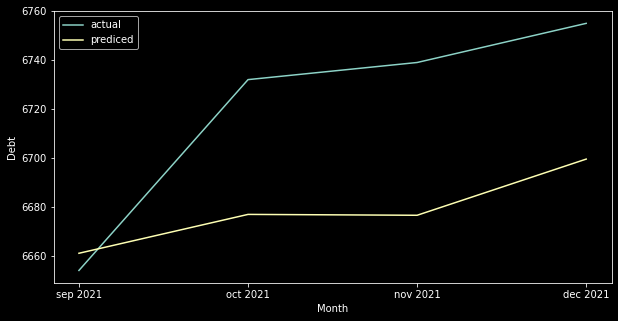

In [54]:
### plot between the actual_debt and predicted_debt 

x = ['sep 2021', 'oct 2021', 'nov 2021', 'dec 2021']

plt.figure(figsize=(10, 5))
plt.plot(x, y_test_actual[:, 0], label='actual')
plt.plot(x, y_hat_predicted[:, 0], label='prediced')
plt.xlabel("Month")
plt.ylabel("Debt")
plt.legend()
plt.show()

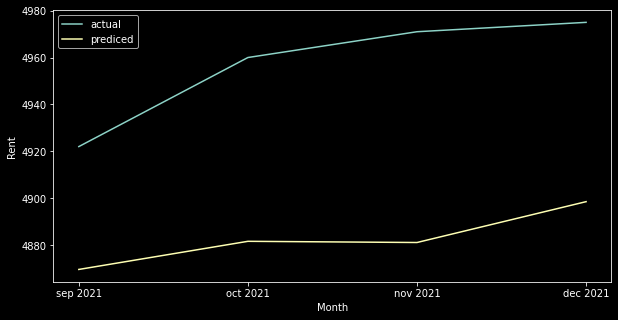

In [55]:
### plot between the actual_rent and predicted_rent 

plt.figure(figsize=(10, 5))
plt.plot(x, y_test_actual[:, 1], label='actual')
plt.plot(x, y_hat_predicted[:, 1], label='prediced')
plt.xlabel("Month")
plt.ylabel("Rent")
plt.legend()
plt.show()

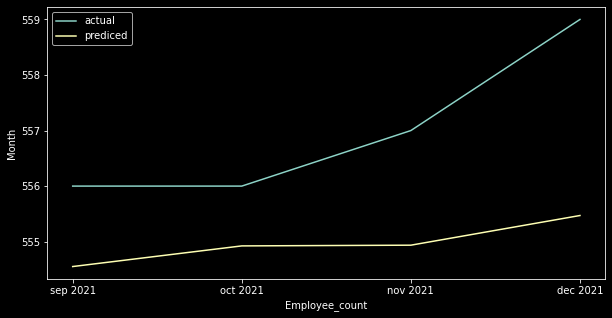

In [56]:
### plot between the actual_employee and predicted_employee 

plt.figure(figsize=(10, 5))
plt.plot(x, y_test_actual[:, 2], label='actual')
plt.plot(x, y_hat_predicted[:, 2], label='prediced')
plt.xlabel("Employee_count")
plt.ylabel("Month")
plt.legend()
plt.show()

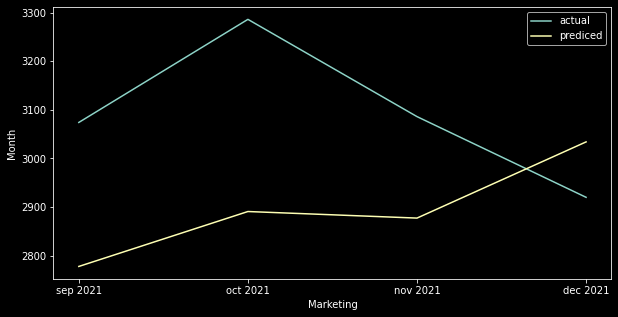

In [57]:
### plot between the actual_marketing and predicted_marketing expense

plt.figure(figsize=(10, 5))
plt.plot(x, y_test_actual[:, 3], label='actual')
plt.plot(x, y_hat_predicted[:, 3], label='prediced')
plt.xlabel("Marketing")
plt.ylabel("Month")
plt.legend()
plt.show()

#### Saving the model

In [58]:
# multi_head_cnn_lstm_model.save('multi_head_cnn_lstm_model.h5')